In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
results_ls = pd.read_csv('logs/results4_link_state.csv')
results_sq = pd.read_csv('logs/results4_sq.csv')
results_pq = pd.read_csv('logs/results4_pq.csv')
results_dqn = pd.read_csv('logs/results4_dqn.csv')

In [4]:
results_ls.head()

,Unnamed: 0,time,count,avg,min,max
0,0,0.0,10.0,35.80,21.0,55.0
1,1,500.0,25.0,44.16,21.0,70.0
2,2,1000.0,25.0,41.64,21.0,70.0
3,3,1500.0,25.0,42.32,21.0,70.0
4,4,2000.0,25.0,44.80,21.0,85.0


In [5]:
results_dqn.head()

,Unnamed: 0,time,count,avg,min,max
0,0,0.0,10.0,37.40,21.0,62.0
1,1,500.0,25.0,44.16,21.0,70.0
2,2,1000.0,25.0,41.68,21.0,70.0
3,3,1500.0,25.0,42.36,21.0,70.0
4,4,2000.0,25.0,44.84,21.0,85.0


In [6]:
def plot_graph(title, *ress):
    min_avg = 10000000
    max_avg = 0
    plt.figure(figsize=(13, 10))
    for (label, res) in ress:
        min_avg = min(min_avg, np.amin(res['avg']))
        max_avg = max(max_avg, np.amax(res['avg']))
        res.drop_duplicates('time', keep='last', inplace=True)
        plt.plot(res['time'], res['avg'], label=label)
    plt.xlabel('Время симулятора')
    plt.ylabel('Среднее время пакета в пути')
    plt.legend()
    plt.ylim((min_avg - 15, max_avg + 15))
    #plt.ylim(0, 100)
    #plt.xlim((30000, 50000))
    plt.title(title)
    plt.show()

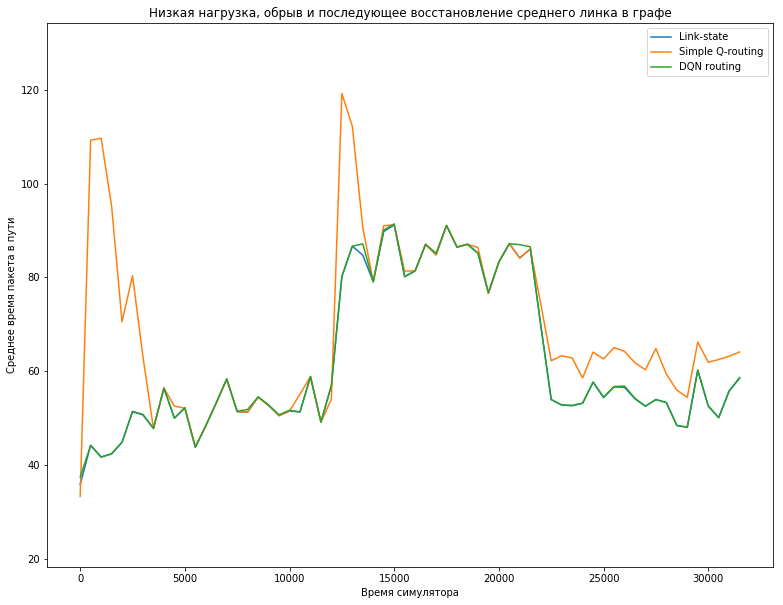

In [7]:
title = 'Низкая нагрузка, обрыв и последующее восстановление среднего линка в графе'
plot_graph(title, ('Link-state', results_ls), ('Simple Q-routing', results_sq), ('DQN routing', results_dqn))

In [27]:
results2_ls = pd.read_csv('logs/results6_link_state.csv')
results2_sq = pd.read_csv('logs/results6_sq.csv')
#results2_pq = pd.read_csv('logs/results6_pq.csv')
results2_dqn = pd.read_csv('logs/results6_dqn.csv')
results2_dqn_out_links = pd.read_csv('logs/results6_dqn_out_links.csv')
results2_dqn_adviced = pd.read_csv('logs/results6_dqn_advice.csv')

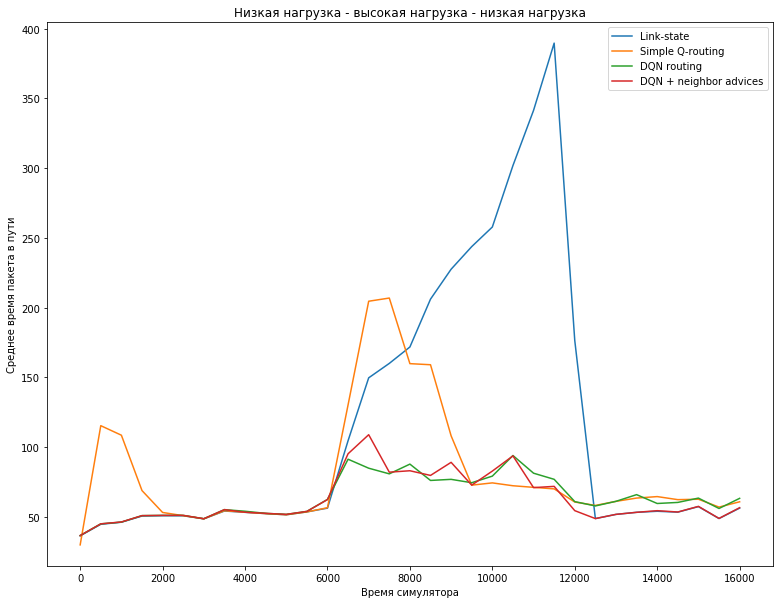

In [28]:
title = 'Низкая нагрузка - высокая нагрузка - низкая нагрузка'
plot_graph(title, ('Link-state', results2_ls), ('Simple Q-routing', results2_sq),
           ('DQN routing', results2_dqn), ('DQN + neighbor advices', results2_dqn_adviced))

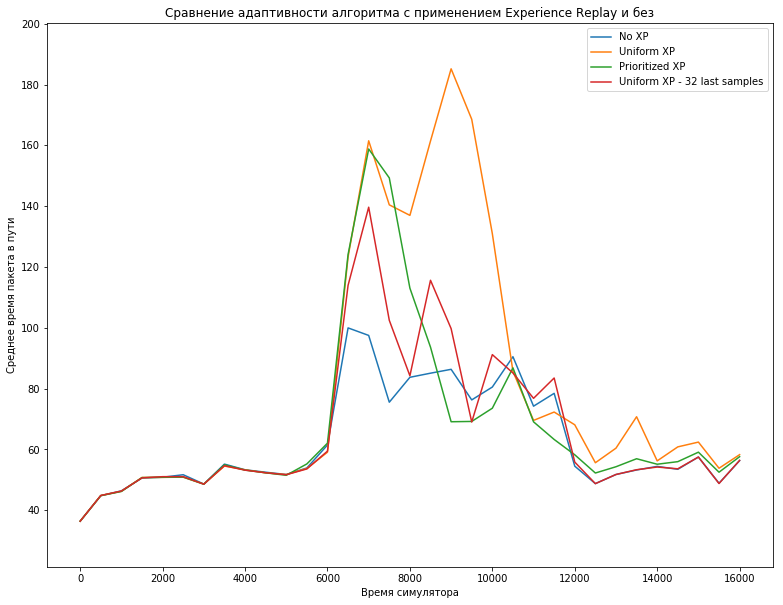

In [70]:
results2_dqn_2 = pd.read_csv('logs/results6_dqn_uniform_xp.csv')
results2_dqn_3 = pd.read_csv('logs/results6_dqn_prioritized_xp.csv')
results2_dqn_4 = pd.read_csv('logs/results6_dqn_uniform_xp_last32.csv')
title = 'Сравнение адаптивности алгоритма с применением Experience Replay и без'
plot_graph(title, ('No XP', results2_dqn), ('Uniform XP', results2_dqn_2), ('Prioritized XP', results2_dqn_3),
           ('Uniform XP - 32 last samples', results2_dqn_4))

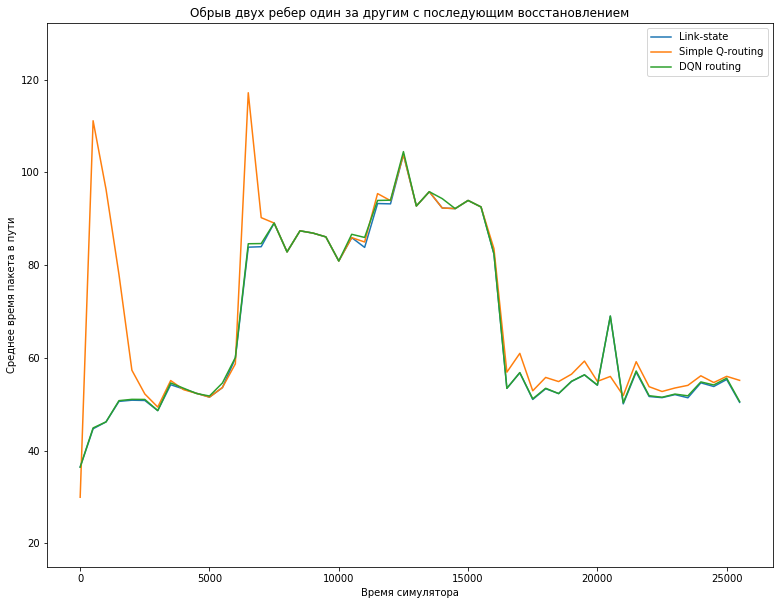

In [52]:
# results3_ls = pd.read_csv('logs/results7_ls.csv')
results3_sq = pd.read_csv('logs/results7_sq.csv')
results3_dqn = pd.read_csv('logs/results7_dqn.csv')
title = 'Обрыв двух ребер один за другим с последующим восстановлением'
plot_graph(title, ('Link-state', results3_ls), ('Simple Q-routing', results3_sq), ('DQN routing', results3_dqn))

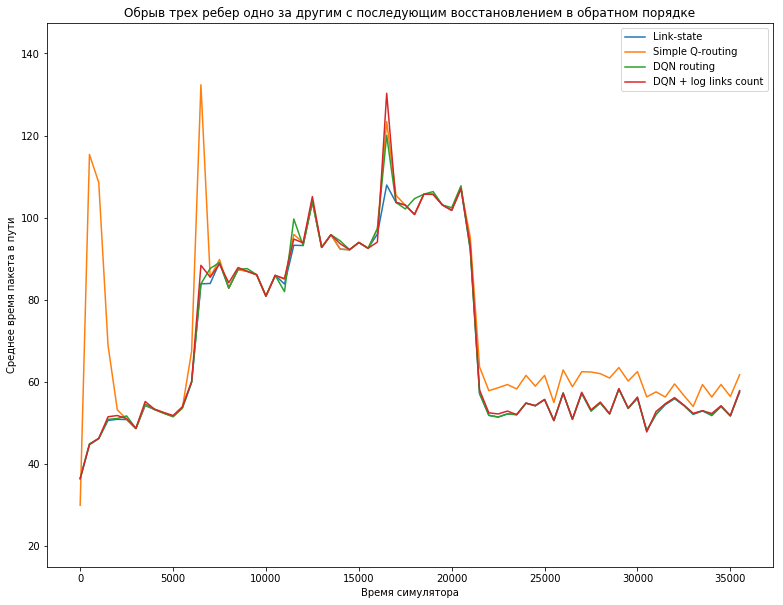

In [78]:
results4_ls = pd.read_csv('logs/results8_ls.csv')
results4_sq = pd.read_csv('logs/results8_sq.csv')
results4_dqn = pd.read_csv('logs/results8_dqn.csv')
resutls4_dqn_out_links = pd.read_csv('logs/results8_dqn_out_links.csv')
title = 'Обрыв трех ребер одно за другим с последующим восстановлением в обратном порядке'
plot_graph(title, ('Link-state', results4_ls), ('Simple Q-routing', results4_sq),
            ('DQN routing', results4_dqn), ('DQN + log links count', resutls4_dqn_out_links))

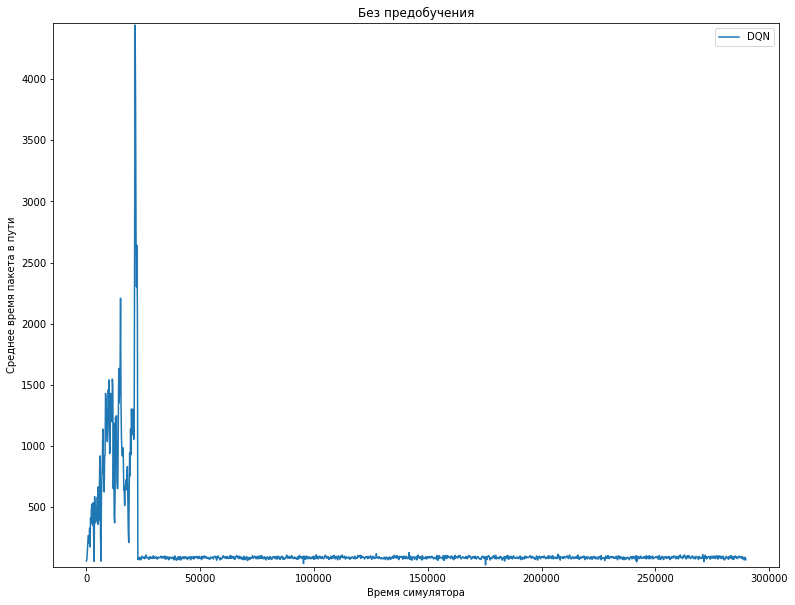

In [74]:
results_no_pretrain = pd.read_csv('logs/results5_no_pretrain_dqn.csv')
results5_ls = pd.read_csv('logs/results5_link_state.csv')
plot_graph('Без предобучения', ('DQN', results_no_pretrain))#, ('Link-state', results5_ls))

In [29]:
results6_ls = pd.read_csv('logs/results10_ls.csv')
results6_sq = pd.read_csv('logs/results10_sq.csv')
#results2_pq = pd.read_csv('logs/results6_pq.csv')
results6_dqn = pd.read_csv('logs/results10_dqn.csv')
results6_dqn_out_links = pd.read_csv('logs/results10_dqn_out_links.csv')
results6_dqn_adviced = pd.read_csv('logs/results10_dqn_advice.csv')

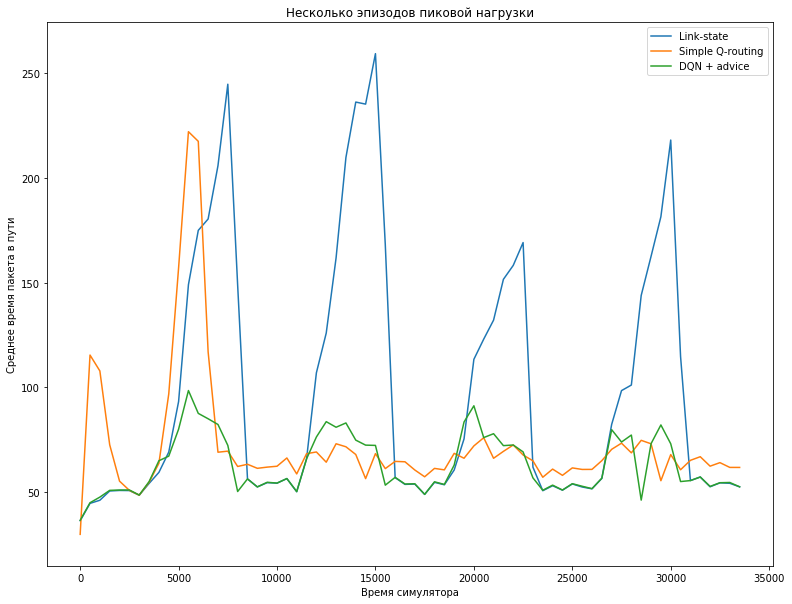

In [30]:
title = 'Несколько эпизодов пиковой нагрузки'
plot_graph(title, ('Link-state', results6_ls), ('Simple Q-routing', results6_sq),
          ('DQN + advice', results6_dqn_adviced))